In [481]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [482]:
f = h5py.File('short-examples/softattention.hdf5', 'r')

In [483]:
attentions = f['attention'][:]

In [484]:
offsets = f['offsets'][:]
offsets

array([ 1, 14, 26])

In [485]:
attentions.shape

(100, 12)

In [486]:
#remove zero rows
# num_examples = np.argmin(attentions[:, 0])
# attentions = attentions[:num_examples]

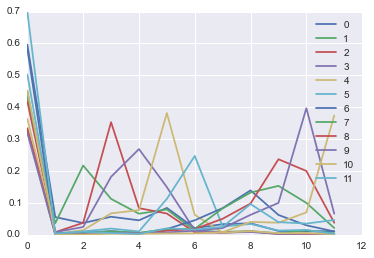

In [487]:
for i in xrange(12):
    plt.plot(attentions[i], label = i)
plt.legend()

In [488]:
#cheating the numbers a little, can comment out
#old_std = np.std(attentions[:, 0])
#before_change = attentions[offsets-2, 0].copy()
#attentions[:, 0] = 0.01#old_std*.02
attentions = attentions[:,1:]
offsets = offsets-1

#attentions[offsets, 0] = before_change

In [489]:
for i in xrange(attentions.shape[0]):
#     attentions[i][0] = 0.
    attentions[i] *= 1/ np.sum(attentions[i])

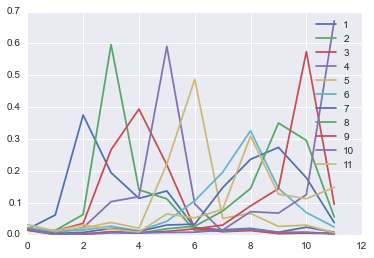

In [490]:
for i in xrange(1,12):
    plt.plot(attentions[i], label = str(i))
plt.legend()

In [513]:
f.close()
f = h5py.File('short-examples/softattention_new.hdf5', 'w')
f['attention'] = attentions
f['offsets'] = offsets
print f['offsets'][:]
f.close()

[ 0 13 25]


In [491]:
translation = []
with open("data/de-short.txt") as f:
    for line in f:
        translation.append(line[:-1])

In [492]:
source = []
with open("data/en-short.txt") as f:
    for line in f:
        source.append(line[:-1])

In [493]:
source

['This is a padding sentence , please ignore it in vis . ',
 'The cat owner ran , because he was scared of dogs .',
 'The cat owner ran , and he was scared of dogs .']

In [512]:
def aligning_attention(offset_index):
    s = source[offset_index].split()[:-1]
#     print len(s)
    t = translation[offset_index].decode('utf-8').split()
#     print len(t)
    i1 = offsets[offset_index]
    print i1
    a = attentions[i1:i1+len(s)]
    print a.shape
    print len(s)
    print len(t)
    plt.figure(figsize=(10,8))
    sns.heatmap(a, xticklabels=s, yticklabels=t)

13 (11, 11)
11
11


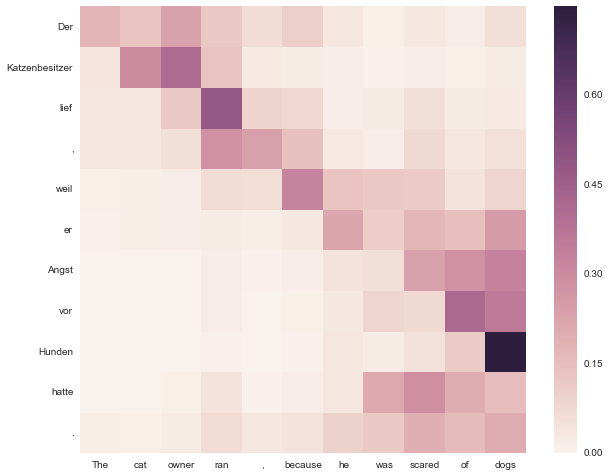

In [511]:
aligning_attention(1)

In [363]:
offsets

array([ 1, 13, 24])

In [270]:
translation[6].decode('utf-8')

u'Der schnelle braune Hund huepfte ueber den faulen Hund . '